In [1]:
import pandas as pd
df = pd.read_csv('cleaned_data (2).csv')
df.head()


,driverId,constructorId,grid,positionOrder,laps,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,num_pit_stops
0,843.0,5.0,16.0,15.0,57.0,24.0,36.3,997.1,False,38.6,2
1,843.0,5.0,16.0,15.0,57.0,24.0,36.3,997.1,False,38.6,2
2,843.0,5.0,16.0,15.0,57.0,23.9,37.2,997.0,False,38.7,2
3,843.0,5.0,16.0,15.0,57.0,24.2,35.8,997.1,False,38.7,2
4,843.0,5.0,16.0,15.0,57.0,24.2,35.8,997.1,False,38.7,2


In [2]:
df = pd.get_dummies(df, drop_first=True)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("cleaned_data (2).csv")

In [5]:
df['Rainfall'] = df['Rainfall'].astype(int)
X = df.drop(columns=['num_pit_stops'])
y = df['num_pit_stops']

In [6]:
# Correlation check
print("Top correlated features with num_pit_stops:")
print(df.corr()['num_pit_stops'].sort_values(ascending=False))

Top correlated features with num_pit_stops:
num_pit_stops    1.000000
laps             0.246527
Humidity         0.202626
Rainfall         0.175833
constructorId    0.063562
Pressure         0.057459
driverId         0.027156
positionOrder    0.003406
grid            -0.003803
TrackTemp       -0.110552
AirTemp         -0.166260
Name: num_pit_stops, dtype: float64


In [7]:
# Split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Check for distribution shift
df['split'] = 'train'
df.loc[X_test.index, 'split'] = 'test'
print("\n🔎 Feature distribution by split (mean values):")
print(df.groupby('split')[['laps', 'Humidity', 'Rainfall']].mean())


🔎 Feature distribution by split (mean values):
            laps   Humidity  Rainfall
split                                
test   58.666846  55.104387  0.078122
train  58.663201  55.136529  0.078438


In [9]:
# Define model
model = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42
)

In [10]:
# Train model
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=50, random_state=42)

In [11]:
# Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # manually take sqrt for compatibility
r2 = r2_score(y_test, y_pred)
approx_acc = (1 - rmse / y_test.mean()) * 100

In [13]:
print(f"\n🔍 Evaluation on Test Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Approximate Regression Accuracy: {approx_acc:.2f}%")


🔍 Evaluation on Test Set:
Root Mean Squared Error (RMSE): 0.4155
R² Score: 0.8902
Approximate Regression Accuracy: 83.37%


In [14]:
# Cross-validation with shuffling
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
print(f"\n📊 Cross-Validation R² Scores: {cv_scores}")
print(f"Mean R² from CV: {cv_scores.mean():.4f}")


📊 Cross-Validation R² Scores: [0.89009485 0.88931154 0.88649305 0.8919841  0.89091262]
Mean R² from CV: 0.8898


In [15]:
# Plot feature importances
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

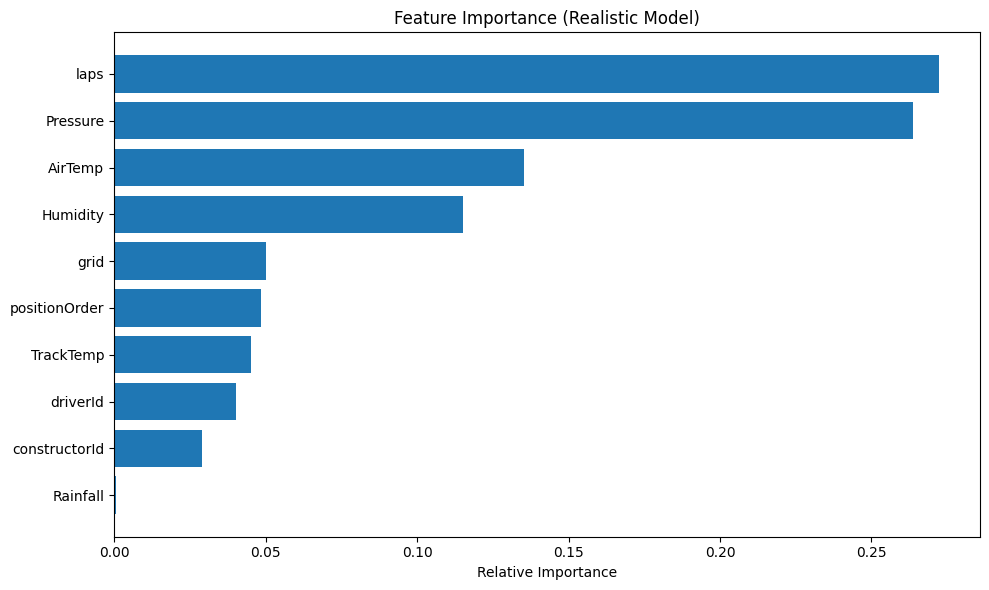

In [16]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Realistic Model)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.tight_layout()
plt.show()


In [17]:
# Predict and evaluate on training data
y_train_pred = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
approx_acc_train = (1 - rmse_train / y_train.mean()) * 100

print(f"\n🧪 Evaluation on Training Set:")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.4f}")
print(f"R² Score: {r2_train:.4f}")
print(f"Approximate Regression Accuracy: {approx_acc_train:.2f}%")



🧪 Evaluation on Training Set:
Root Mean Squared Error (RMSE): 0.4152
R² Score: 0.8914
Approximate Regression Accuracy: 83.42%


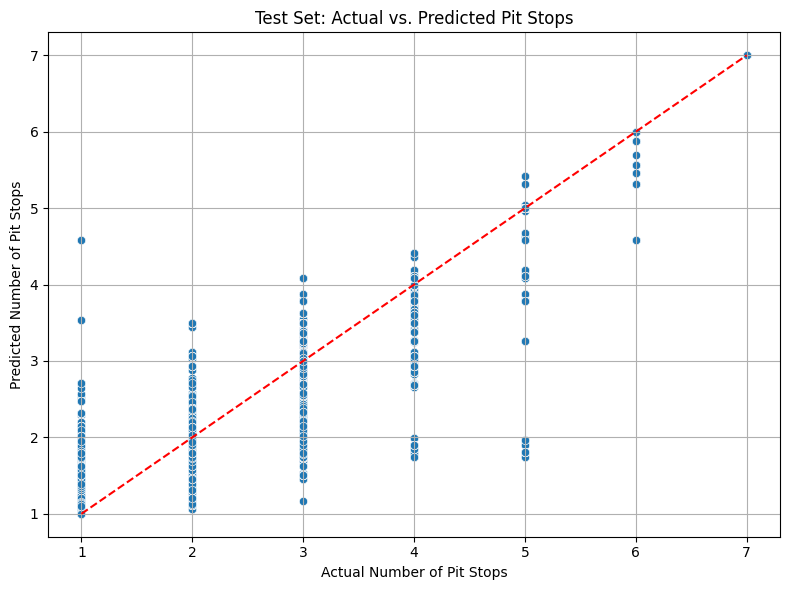

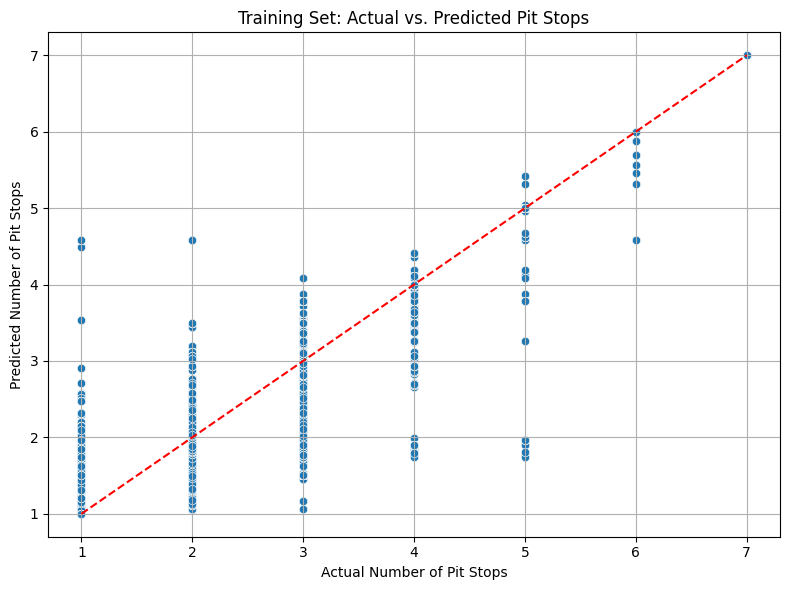

In [20]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Number of Pit Stops")
plt.ylabel("Predicted Number of Pit Stops")
plt.title("Test Set: Actual vs. Predicted Pit Stops")
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual Number of Pit Stops")
plt.ylabel("Predicted Number of Pit Stops")
plt.title("Training Set: Actual vs. Predicted Pit Stops")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)